In [108]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [109]:
bldg = np.loadtxt('bldg.npy')

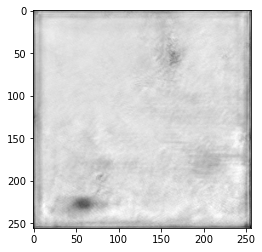

In [110]:
plt.imshow(bldg, cmap='gray')

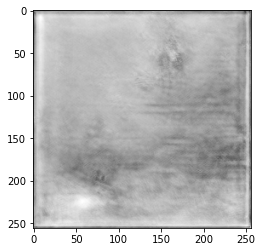

In [111]:
back = np.loadtxt('back.npy')
plt.imshow(back, cmap = "gray")

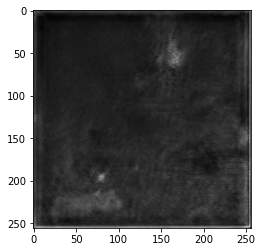

In [112]:
out = np.loadtxt('out.npy')
plt.imshow(out, cmap = "gray")

In [113]:
pred = np.ones(shape=bldg.shape)

In [114]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [115]:
bldg_sig = sigmoid(bldg) * 255
bldg_sig = bldg_sig.astype(np.uint16)
_,bldg_th = cv2.threshold(bldg_sig,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [116]:
back_sig = sigmoid(back) * 255
back_sig = back_sig.astype(np.uint16)
_,back_th = cv2.threshold(back_sig,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [117]:
out_sig = sigmoid(out) * 255
out_sig = out_sig.astype(np.uint16)
_,out_th = cv2.threshold(out_sig,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [118]:
out_th = out_th.astype(np.bool)
back_th = back_th.astype(np.bool)
bldg_th = bldg_th.astype(np.bool)

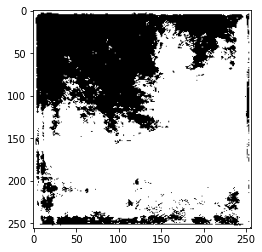

In [119]:
pred[bldg_th] = 1
pred[back_th] = 0
pred[out_th] = 1
plt.imshow(pred, cmap="gray")